In [78]:
# (주가 시계열 자료). 야후 파이낸스(finance.yahoo.com)에서 주가에 대한 정보를 확인할 수 있다. 
# 아마존(amazon.com, AMZN)과 넷플릭스(netflix.com, NFLX)를 검색해보자. 
# Historical data에서 자료구간과 계절주기를 각각 최근 5년 (2014/01-현재) 및 월별로 설정한 후 자료를 다운받도록 한다. 
# 각각의 자료에 대하여 다음의 작업을 수행한다.

NFLX <- read.csv("./NFLX.csv", skip = 1, header = F)
colnames(NFLX) <- c("Date","Open","High","Low","Close*","Adj Close**","Volume")
head(NFLX)

Date,Open,High,Low,Close*,Adj Close**,Volume
2014-01-01,52.40143,58.91429,45.58143,58.47572,58.47572,600418700
2014-02-01,58.84286,65.39857,56.71571,63.66143,63.66143,317384200
2014-03-01,63.02714,65.42857,49.98286,50.29000,50.29000,377239800
2014-04-01,50.25000,54.41143,42.78571,46.00571,46.00571,648605300
2014-05-01,46.29286,60.24857,44.90857,59.69000,59.69000,523837300
2014-06-01,59.92571,64.40286,58.92857,62.94286,62.94286,352660000


In [79]:
# (a) R의 decompose함수를 이용하여 자료를 추세(trend), 계절성(seasonal) 및 랜덤(random) 성분으로 분해하여 각각의 그림을 그린다. 
# 아마존(amazon.com, AMZN) : 가법모형(type="additive"), 승법모형(type="multi")

NFLX<- ts(NFLX[,-1], start = 2014, freq = 12)

NFLX.add.Open.ts <- decompose(NFLX[,c('Open')], type="additive")
NFLX.add.High.ts <- decompose(NFLX[,c('High')], type="additive")
NFLX.add.Close.ts <- decompose(NFLX[,c('Close*')], type="additive")
NFLX.add.AdjClose.ts <- decompose(NFLX[,c('Adj Close**')], type="additive")
NFLX.add.Volume.ts <- decompose(NFLX[,c('Volume')], type="additive")

NFLX.mul.Open.ts <- decompose(NFLX[,c('Open')], type="multi")
NFLX.mul.High.ts <- decompose(NFLX[,c('High')], type="multi")
NFLX.mul.Close.ts <- decompose(NFLX[,c('Close*')], type="multi")
NFLX.mul.AdjClose.ts <- decompose(NFLX[,c('Adj Close**')], type="multi")
NFLX.mul.Volume.ts <- decompose(NFLX[,c('Volume')], type="multi")

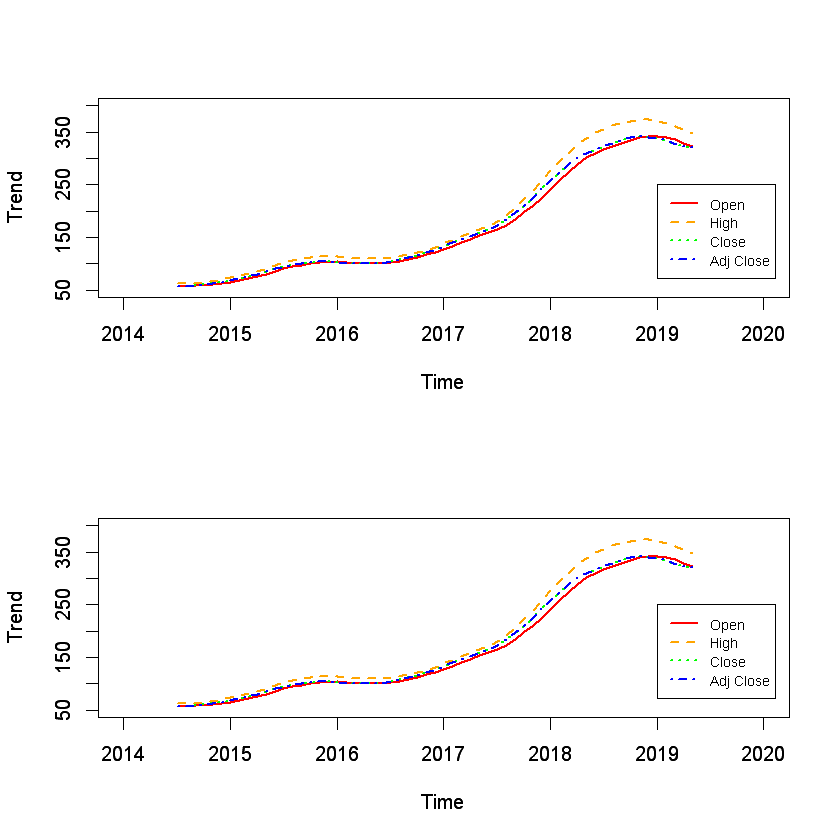

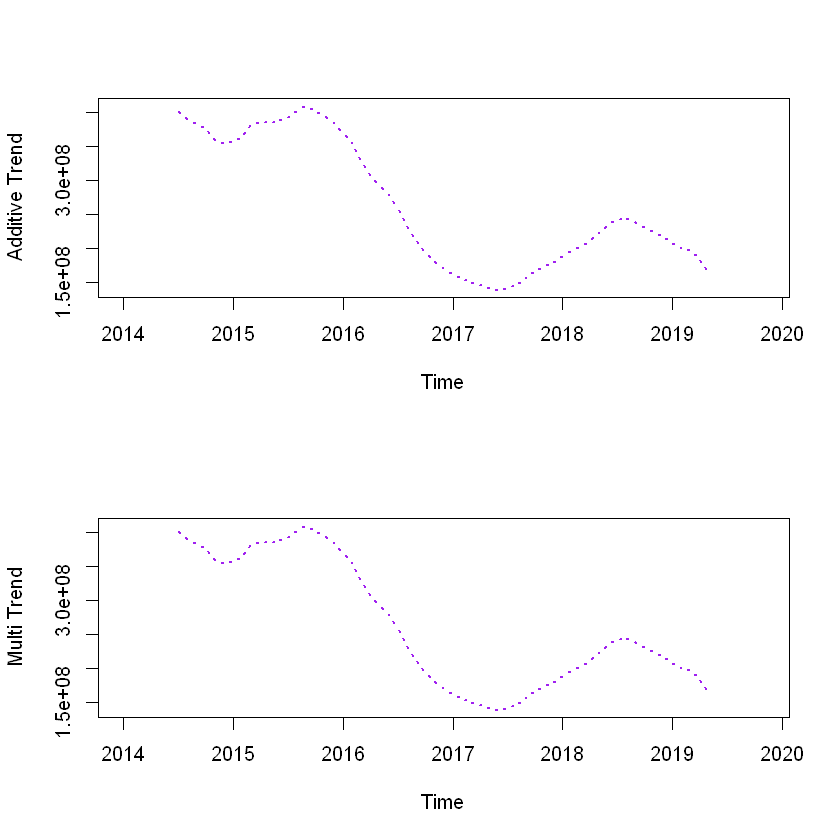

In [71]:
# Trend 를 이용하여 자료를 분석하고 결과를 비교한다.

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(NFLX.add.Open.ts$trend
     , col='red'
     , lty=1
     , lwd=2
     , xlim=range(2014, 2020)
     , ylim=range(50,400)
     , ylab='Trend') ; par(new=TRUE)

plot(NFLX.add.High.ts$trend, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(50,400), ylab='Trend') ; par(new=TRUE)
plot(NFLX.add.Close.ts$trend, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(50,400), ylab='Trend') ; par(new=TRUE)
plot(NFLX.add.AdjClose.ts$trend, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(50,400), ylab='Trend')

legend(2019, 250, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.7)

plot(NFLX.mul.Open.ts$trend, col='red', lty=1, lwd=2, xlim=range(2014, 2020), ylim=range(50,400), ylab='Trend') ; par(new=TRUE)
plot(NFLX.mul.High.ts$trend, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(50,400), ylab='Trend') ; par(new=TRUE)
plot(NFLX.mul.Close.ts$trend, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(50,400), ylab='Trend') ; par(new=TRUE)
plot(NFLX.mul.AdjClose.ts$trend, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(50,400), ylab='Trend')

legend(2019, 250, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.7)

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(NFLX.add.Volume.ts$trend, col='purple', lty=3, lwd=2, ylab='Additive Trend')
plot(NFLX.mul.Volume.ts$trend, col='purple', lty=3, lwd=2, ylab='Multi Trend')

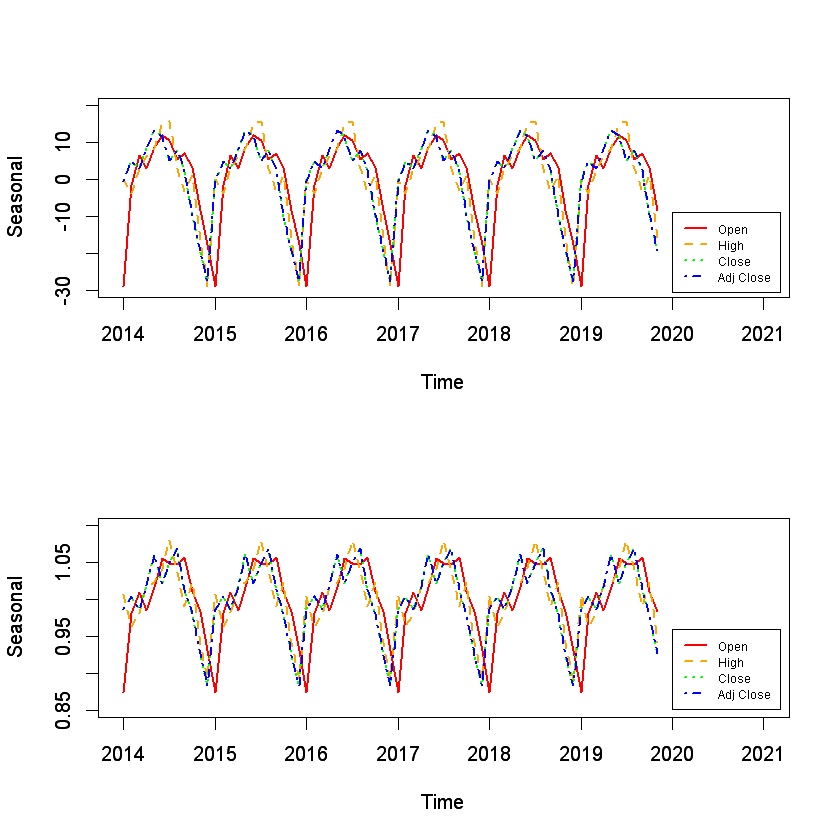

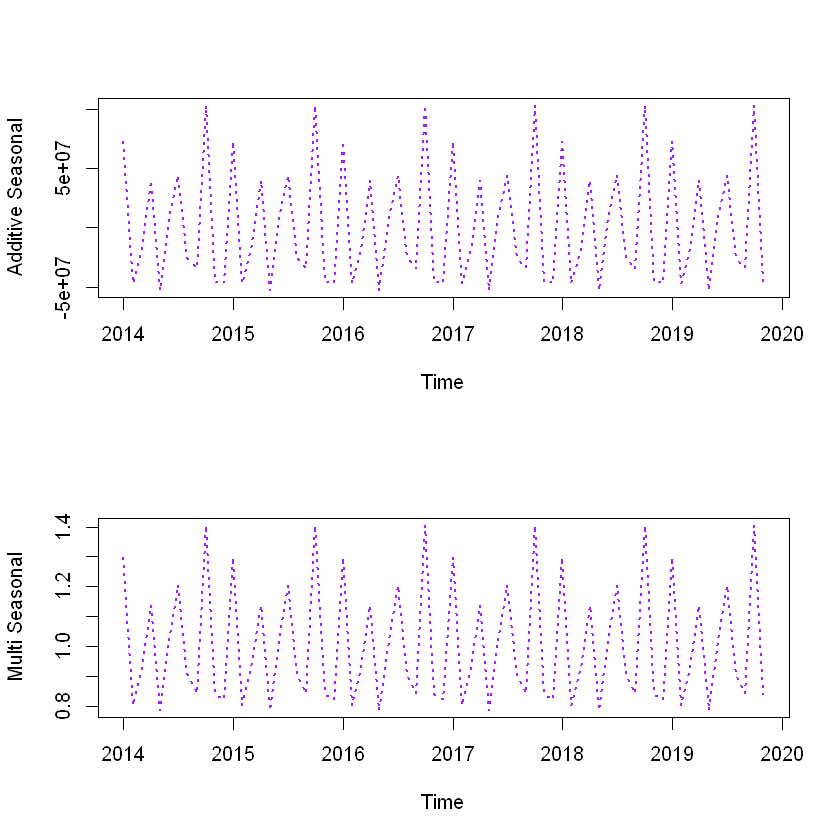

In [72]:
# Seasonal 을 이용하여 자료를 분석하고 결과를 비교한다.

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(NFLX.add.Open.ts$seasonal
     , col='red'
     , lty=1
     , lwd=2
     , xlim=range(2014, 2021)
     , ylim=range(-30,20)
     , ylab='Seasonal') ; par(new=TRUE)

plot(NFLX.add.High.ts$seasonal,col='orange', lty=2, lwd=2, xlim=range(2014, 2021), ylim=range(-30,20), ylab='Seasonal');par(new=TRUE)
plot(NFLX.add.Close.ts$seasonal,col='green', lty=3, lwd=2, xlim=range(2014, 2021), ylim=range(-30,20), ylab='Seasonal');par(new=TRUE)
plot(NFLX.add.AdjClose.ts$seasonal,col='blue', lty=4, lwd=2, xlim=range(2014, 2021), ylim=range(-30,20), ylab='Seasonal')

legend(2020, -9, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.6)

plot(NFLX.mul.Open.ts$seasonal,col='red', lty=1, lwd=2, xlim=range(2014, 2021), ylim=range(0.85,1.1), ylab='Seasonal');par(new=TRUE)
plot(NFLX.mul.High.ts$seasonal,col='orange', lty=2, lwd=2, xlim=range(2014, 2021), ylim=range(0.85,1.1), ylab='Seasonal');par(new=TRUE)
plot(NFLX.mul.Close.ts$seasonal,col='green', lty=3, lwd=2, xlim=range(2014, 2021), ylim=range(0.85,1.1), ylab='Seasonal');par(new=TRUE)
plot(NFLX.mul.AdjClose.ts$seasonal,col='blue', lty=4, lwd=2, xlim=range(2014, 2021), ylim=range(0.85,1.1), ylab='Seasonal')

legend(2020, 0.96, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.6)

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(NFLX.add.Volume.ts$seasonal, col='purple', lty=3, lwd=2, ylab='Additive Seasonal')
plot(NFLX.mul.Volume.ts$seasonal, col='purple', lty=3, lwd=2, ylab='Multi Seasonal')

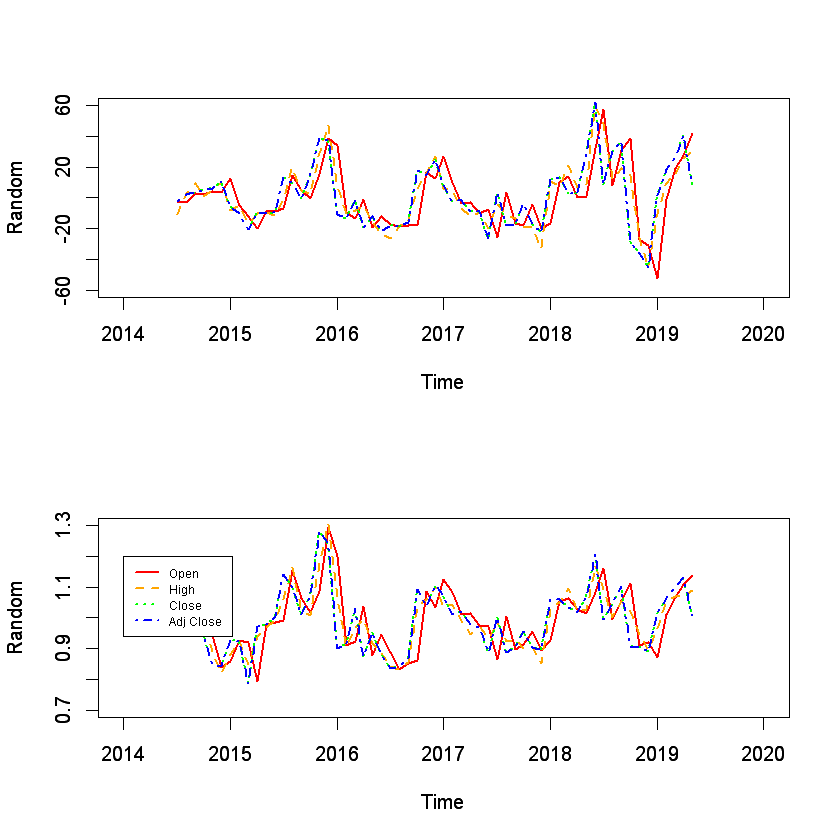

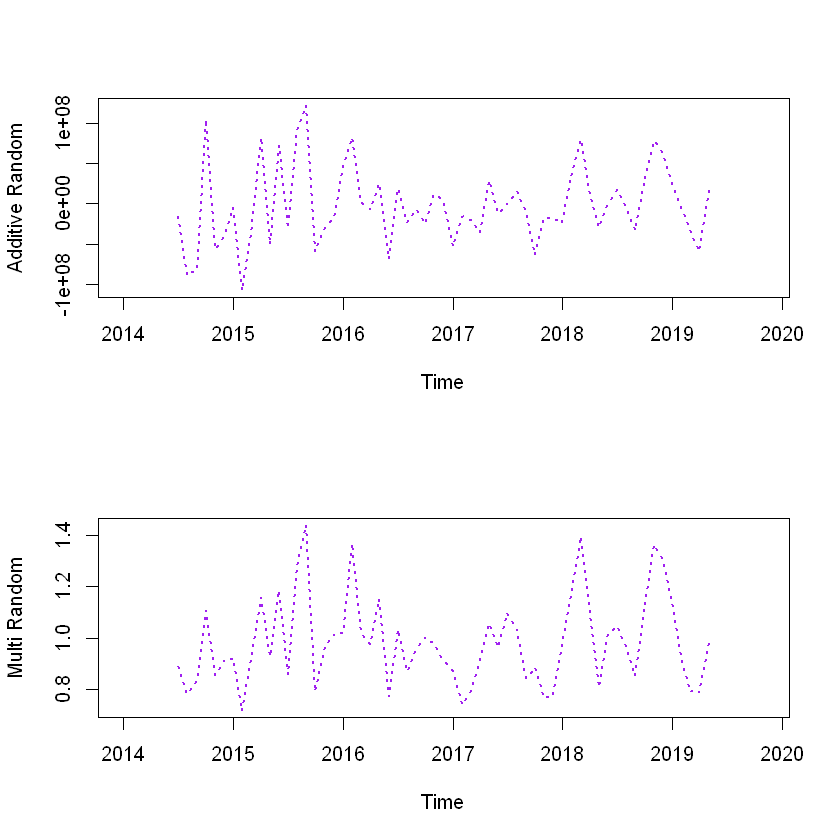

In [73]:
# Random 을 이용하여 자료를 분석하고 결과를 비교한다.

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(NFLX.add.Open.ts$random
     , col='red'
     , lty=1
     , lwd=2
     , xlim=range(2014, 2020)
     , ylim=range(-60,60)
     , ylab='Random') ; par(new=TRUE)

plot(NFLX.add.High.ts$random, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(-60,60), ylab='Random') ; par(new=TRUE)
plot(NFLX.add.Close.ts$random, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(-60,60), ylab='Random') ; par(new=TRUE)
plot(NFLX.add.AdjClose.ts$random, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(-60,60), ylab='Random')

legend(2014, 300, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.6)

plot(NFLX.mul.Open.ts$random, col='red', lty=1, lwd=2, xlim=range(2014, 2020), ylim=range(0.7,1.3), ylab='Random') ; par(new=TRUE)
plot(NFLX.mul.High.ts$random, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(0.7,1.3), ylab='Random') ; par(new=TRUE)
plot(NFLX.mul.Close.ts$random, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(0.7,1.3), ylab='Random') ; par(new=TRUE)
plot(NFLX.mul.AdjClose.ts$random, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(0.7,1.3), ylab='Random')

legend(2014, 1.2, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.6)

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(NFLX.add.Volume.ts$random, col='purple', lty=3, lwd=2, ylab='Additive Random')
plot(NFLX.mul.Volume.ts$random, col='purple', lty=3, lwd=2, ylab='Multi Random')

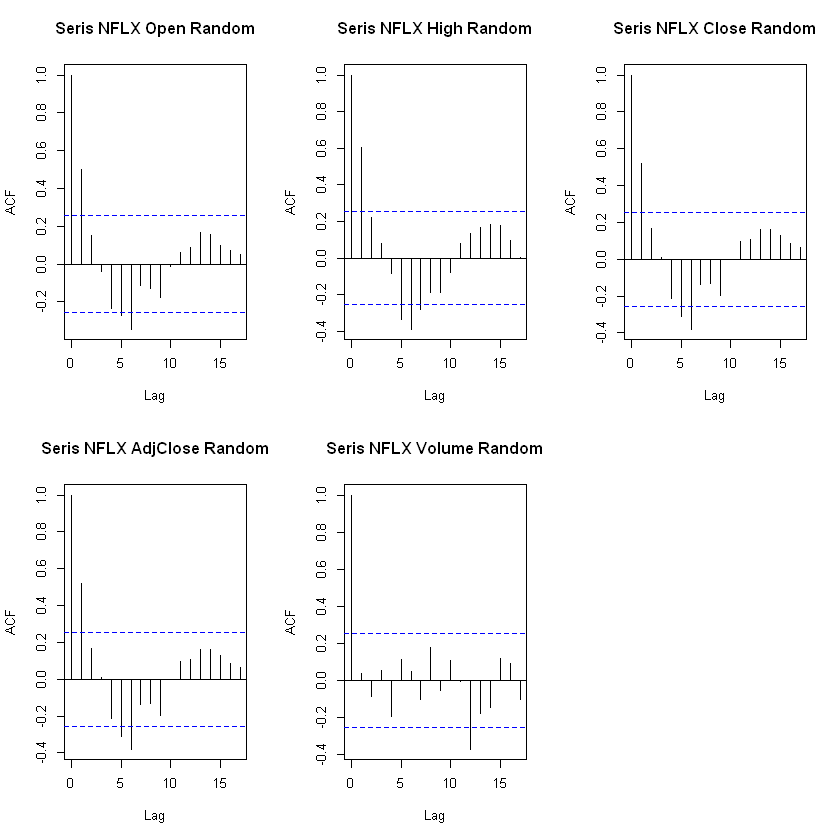

In [74]:
# (b) R의 acf함수를 이용, (a)의 랜덤요소에 대한 자기상관계수를 그리고 이를 해석한다.
layout(mat=matrix(c(1, 2, 3,
                    4, 5, 6), nrow=2, byrow = TRUE))

acf(NFLX.add.Open.ts$random[7:65], main="Seris NFLX Open Random")
acf(NFLX.add.High.ts$random[7:65], main="Seris NFLX High Random")
acf(NFLX.add.Close.ts$random[7:65], main="Seris NFLX Close Random")
acf(NFLX.add.AdjClose.ts$random[7:65], main="Seris NFLX AdjClose Random")
acf(NFLX.add.Volume.ts$random[7:65], main="Seris NFLX Volume Random")

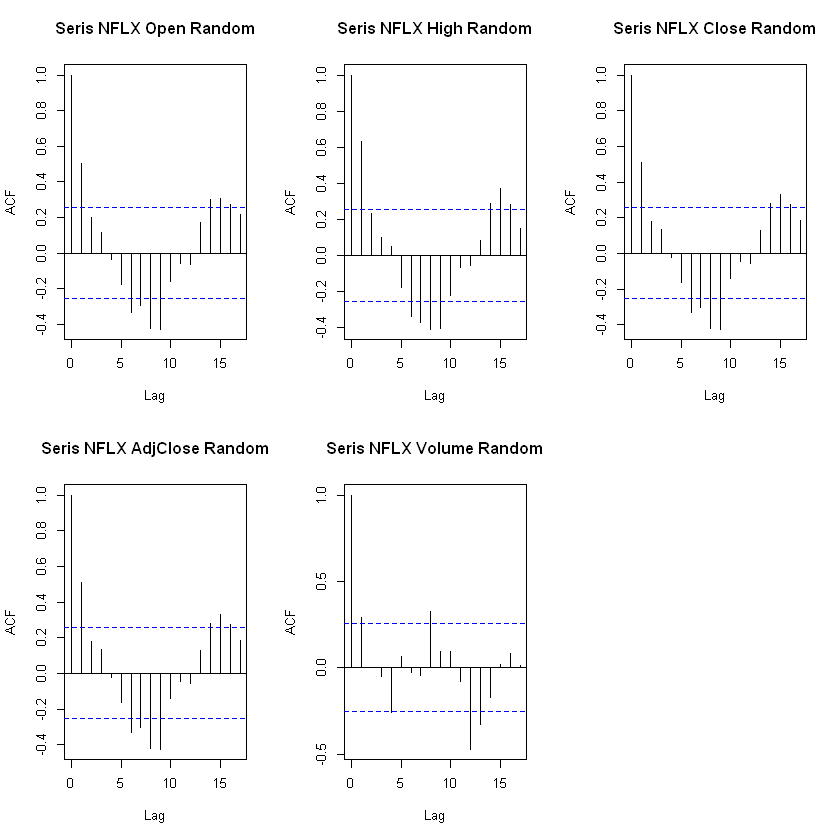

In [75]:
layout(mat=matrix(c(1, 2, 3,
                    4, 5, 6), nrow=2, byrow = TRUE))

acf(NFLX.mul.Open.ts$random[7:65], main="Seris NFLX Open Random")
acf(NFLX.mul.High.ts$random[7:65], main="Seris NFLX High Random")
acf(NFLX.mul.Close.ts$random[7:65], main="Seris NFLX Close Random")
acf(NFLX.mul.AdjClose.ts$random[7:65], main="Seris NFLX AdjClose Random")
acf(NFLX.mul.Volume.ts$random[7:65], main="Seris NFLX Volume Random")